In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler as Scaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [57]:
data = pd.read_csv('diabetes.csv')

data.columns = ['NumPregnant','GlucoseConc', 'BloodPressure',
               'SkinThick', 'Insulin', 'BMI',
               'DiabPedFunc', 'Age', 'Diabetes']

In [58]:
data.isnull().values.any()

False

In [59]:
data.shape

(768, 9)

In [69]:
data.head(10)

,NumPregnant,GlucoseConc,BloodPressure,SkinThick,Insulin,BMI,DiabPedFunc,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [60]:
# Data correlation matrix

corr = data.corr()
corr

,NumPregnant,GlucoseConc,BloodPressure,SkinThick,Insulin,BMI,DiabPedFunc,Age,Diabetes
NumPregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
GlucoseConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


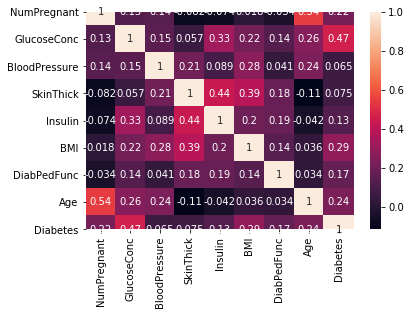

In [70]:
sns.heatmap(corr, annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B097C5CD48>,
      dtype=object)

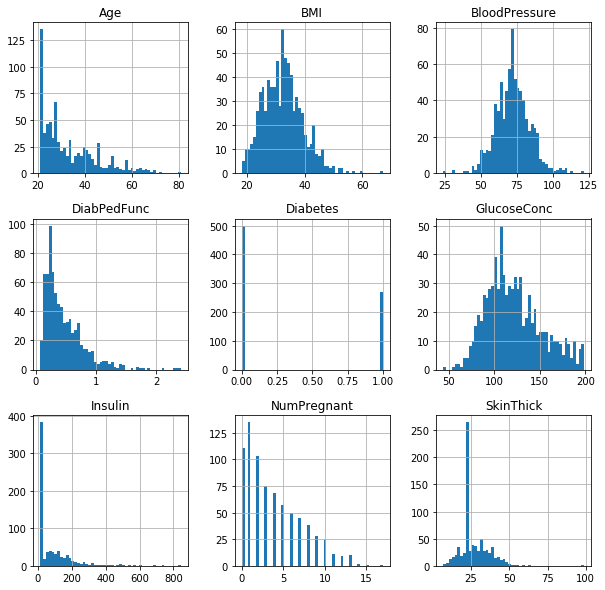

In [73]:
# Data visualisation 

data.hist(bins=50, figsize=(10,10))

In [78]:
# Data processing - cleaning and transformation

bmi_median = data['BMI'].median()
data['BMI'] = data['BMI'].replace(to_replace=0, value=bmi_median)

bloodpres_median = data['BloodPressure'].median()
data['BloodPressure'] = data['BloodPressure'].replace(to_replace=0, value=bloodpres_median)

glucoseconc_median = data['GlucoseConc'].median()
data['GlucoseConc'] = data['GlucoseConc'].replace(to_replace=0, value=glucoseconc_median)

skinthick_median = data['SkinThick'].median()
data['SkinThick'] = data['SkinThick'].replace(to_replace=0, value=skinthick_median)

insulin_median = data['Insulin'].median()
data['Insulin'] = data['Insulin'].replace(to_replace=0, value=insulin_median)

In [96]:
# Data split: training dataset, test dataset

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

train_set_labels = train_set['Diabetes'].copy()
train_set = train_set.drop('Diabetes', axis=1)

test_set_labels = test_set['Diabetes'].copy()
test_set = test_set.drop('Diabetes', axis=1)

In [86]:
# Feature scaling

scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

df = pd.DataFrame(data=train_set_scaled)
df.head(10)

,0,1,2,3,4,5,6,7
0,0.117647,0.258065,0.489796,0.272727,0.019832,0.282209,0.096499,0.000000
1,0.529412,0.438710,0.591837,0.290909,0.019832,0.204499,0.514091,0.483333
2,0.058824,0.612903,0.224490,0.200000,0.082933,0.214724,0.245944,0.016667
3,0.000000,0.754839,0.265306,0.272727,0.019832,0.075665,0.075149,0.733333
4,0.352941,0.580645,0.571429,0.527273,0.427885,0.572597,0.068318,0.416667
5,0.058824,0.554839,0.469388,0.090909,0.109375,0.157464,0.168232,0.016667
6,0.235294,0.567742,0.489796,0.272727,0.019832,0.300613,0.095645,0.033333
7,0.588235,0.754839,0.448980,0.272727,0.141827,0.149284,0.105892,0.433333
8,0.058824,0.412903,0.367347,0.690909,0.197115,0.353783,0.143894,0.050000
9,0.058824,0.232258,0.316327,0.272727,0.019832,0.018405,0.076857,0.000000


In [99]:
# Best parameters selection and model training

param_grid = {
    'C': [1.0, 10.0, 50.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

model_svc = SVC()
grid_search = GridSearchCV(model_svc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(train_set_scaled, train_set_labels)
svc = grid_search.best_estimator_

X = np.append(train_set_scaled, test_set_scaled, axis=0)
Y = np.append(train_set_labels, test_set_labels, axis=0)

svc.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [116]:
# Prediction

new_df = pd.DataFrame([[3, 120, 70, 33, 0, 42.2, 0.67, 40]])
new_df_scaled = scaler.transform(new_df)
prediction = svc.predict(new_df_scaled)
diab = bool(prediction)

print('The new person has diabetes:', diab)

The new person has diabetes: True
